In [1]:
# Import Libraries

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

# modeling imports
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV,ElasticNetCV, ElasticNet
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import metrics
import statsmodels.api as sm

#set_style
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'retina'

In [2]:
# Load data, read in cleaned data file

clean_csv_ames = r'C:\myLib\IOD\Classwork\Mini Project 2\ames_train_clean.csv'.replace('\\','/')

ames_clean = pd.read_csv(clean_csv_ames)

In [3]:
# shape of date file

ames_clean.shape

(2033, 31)

In [4]:
# Rename columns so feature importance is easier to read. 

ames_clean.rename(columns={'saleprice': 'Sales Price', 
                           'age': 'Building Age',
                           'neighborhood_order': 'Neighboorhood Quality Index',
                           'local_conditions': 'Local Positive Features',
                           'was_remodeled': 'Remodeled Building',
                           'overall_qual': 'Overall Building Quality',
                           'house_style_condensed_1.5': 'Single Story Building',
                           'house_style_condensed_2.0': 'Multiple Story Building',
                           'exter_qual': 'External Quality',
                           'external_feature': 'Type of External Building Feature',
                           'bldg_type_TwnhsE': 'Middle-unit Townhouse',
                           'bldg_type_Twnhs': 'End-unit Townhouse',
                           'bldg_type_2fmCon': 'Family House',
                           'is_hip_roof': 'High Roof Quality',
                           'mas_vnr_area': 'Masonry Vaneer Sqft',
                           'functional': 'Building Functionality',
                           'lot_frontage': 'Lot Frontage',
                           'lot_area': 'Lot Size',
                           'developed_outside_sf': 'Outside Grill Space',
                           'garage_fin*sqft': 'Shop Space',
                           'garage_cars': 'Additional Car Garage',
                           'paved_drive': 'Paved Driveway',
                           'bsmt_qual': 'Basement Quality',
                           'bsmt_type*sf_all': 'Finished Basement Sqft',
                           'bsmt_exposure': 'Basement Ceiling Height',
                           'heating_qc': 'Heater Quality',
                           'kitchen_qual': 'Kitchen Quality ',
                           'fireplace_qu': 'Fireplace Quality',
                           'quality_above_sqft': 'Finished Upstairs Sqft',
                           'totrms_abvgrd': 'Rooms Upstairs',
                           'room_size': 'Size of Rooms',                           
                          }, inplace=True)

# Columns in data file

ames_clean.columns

Index(['Sales Price', 'Building Age', 'Neighboorhood Quality Index',
       'Local Positive Features', 'Remodeled Building',
       'Overall Building Quality', 'Single Story Building',
       'Multiple Story Building', 'External Quality',
       'Type of External Building Feature', 'Middle-unit Townhouse',
       'End-unit Townhouse', 'Family House', 'High Roof Quality',
       'Masonry Vaneer Sqft', 'Building Functionality', 'Lot Frontage',
       'Lot Size', 'Outside Grill Space', 'Shop Space',
       'Additional Car Garage', 'Paved Driveway', 'Basement Quality',
       'Finished Basement Sqft', 'Basement Ceiling Height', 'Heater Quality',
       'Kitchen Quality ', 'Fireplace Quality', 'Finished Upstairs Sqft',
       'Rooms Upstairs', 'Size of Rooms'],
      dtype='object')

In [5]:
# Calculate a baseline score to base all of the models off of by taking the Mean Root Square Error of the mean 
# building sale price

ames_clean['y_niave'] = ames_clean['Sales Price'].mean()

In [6]:
MRSE = metrics.mean_squared_error(y_true=ames_clean['Sales Price'], y_pred=ames_clean['y_niave'] )**.5

print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 73422.04.


In [7]:
# Prepare data by splitting the model data frame into X (dependent variable) and y (independent variables) arrays 
# then splitting those sets into a train and test set. This way we will be able to test the model on unseen data.

# Prepare data for modeling
# create X and y variables

X = ames_clean.drop(columns=['Sales Price', 'y_niave'])

y = ames_clean['Sales Price']

In [8]:
#split into training and test groups

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=.2, train_size = .8)

# Unscaled Linear Regression Model

In [9]:
# Run unscaled linear regression model

# Instantiate, fit and score 

lr = LinearRegression()
lr.fit(X=X_train, y=y_train)

print(f' Unscaled Linear Regression training R^2 score: {round(lr.score(X=X_train, y=y_train),4)}')
print(f' Unscaled Linear Regression test R^2 score: {round(lr.score(X_test, y_test),4)}')

 Unscaled Linear Regression training R^2 score: 0.9022
 Unscaled Linear Regression test R^2 score: 0.8834


In [10]:
# Run OLS in statsmodels so we can examine p-values against a 95% confidence interval as a statistical significance test 
# on our independent variables. The null hypothesis is that our model data frame’s features do not have a statistically 
# significant effect on a building's sale price. To test the null hypothesis I will examine if the p-values — a measure 
# of the probability that an observed difference could have occurred just by random chance — are less than .05. 
# The smaller the result the stronger the evidence in favor of the alternative hypothesis, although we accept at <.05

X = sm.add_constant(X)
ols = sm.OLS(y, X).fit()

C:\Users\kelvin.liew\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [11]:
#let's take a quick look at the summary stats of our ordinary least squares

ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sales Price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.897
Method:                 Least Squares   F-statistic:                     592.7
Date:                Fri, 11 Mar 2022   Prob (F-statistic):               0.00
Time:                        01:35:48   Log-Likelihood:                -23334.
No. Observations:                2033   AIC:                         4.673e+04
Df Residuals:                    2002   BIC:                         4.690e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                             -1.564e+05   1.01e+04    -15.545      0.000   -1.76e+05   -1.37e+05
Building Age                        -40.6668     36.680     -1.109      0.268    -112.602      31.269
Neighboorhood Quality Index        7226.0408    859.608      8.406      0.000    5540.221    8911.861
Local Positive Features            8257.2484   1348.517      6.123      0.000    5612.605    1.09e+04
Remodeled Building                 5097.0833   1239.908      4.111      0.000    2665.439    7528.728
Overall Building Quality           1.006e+04    734.989     13.685      0.000    8616.785    1.15e+04
Single Story Building             -1070.0112   1850.924     -0.578      0.563   -4699.950    2559.928
Multiple Story Building           -9941.7499   1604.347     -6.197      0.000   -1.31e+04   -6795.386
External Quality                   1.169e+04   1610.601      7.260      0.000    8534.285    1.49e+04
Type of External Building Feature   973.8594    332.541      2.929      0.003     321.697    1626.022
Middle-unit Townhouse             -1.255e+04   2385.837     -5.259      0.000   -1.72e+04   -7868.896
End-unit Townhouse                -1.015e+04   3405.369     -2.979      0.003   -1.68e+04   -3466.850
Family House                      -6211.6793   3669.105     -1.693      0.091   -1.34e+04     983.984
High Roof Quality                  5515.9135   1452.549      3.797      0.000    2667.247    8364.580
Masonry Vaneer Sqft                  22.4923      3.711      6.062      0.000      15.215      29.769
Building Functionality             1.247e+04   2249.223      5.542      0.000    8054.662    1.69e+04
Lot Frontage                        105.4378     32.546      3.240      0.001      41.610     169.266
Lot Size                              0.5194      0.094      5.512      0.000       0.335       0.704
Outside Grill Space                  16.0629      3.807      4.219      0.000       8.597      23.529
Shop Space                            8.7157      1.487      5.863      0.000       5.800      11.631
Additional Car Garage              1669.0096   1101.831      1.515      0.130    -491.845    3829.864
Paved Driveway                      205.5418   1128.761      0.182      0.856   -2008.128    2419.211
Basement Quality                   2308.4638    891.051      2.591      0.010     560.979    4055.949
Finished Basement Sqft                4.7234      0.263     17.938      0.000       4.207       5.240
Basement Ceiling Height            2649.0668    600.362      4.412      0.000    1471.667    3826.466
Heater Quality                     1962.7284    693.650      2.830      0.005     602.377    3323.080
Kitchen Quality                    9685.8061   1261.659      7.677      0.000    7211.504    1.22e+04
Fireplace Quality      

#### In general, the features do a good job passing the test and can accept the alternative hypothesis. 
However, the variables ‘Building Age’, ‘Single Story Building’, ‘Additional Car Garage’, ‘Paved Driveway’, 
and ‘Rooms Upstairs’ do not pass and we cannot reject the null hypothesis. 
However, they are kept in order to preserve feature choice for the Home Buyers

### Linear Regression Model, scaled (all models here on out are scaled)

In [12]:
# Linear Regression Model, scaled (all models here on out are scaled)

sc = StandardScaler()

Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [13]:
lr_stan = LinearRegression()
lr_stan.fit(Z_train, y_train)

print(f' Scaled Linear Regression training R^2 score: {round(lr_stan.score(Z_train, y_train),4)}')
print(f' Scaled Linear Regression test R^2 score: {round(lr_stan.score(Z_test, y_test),4)}')

 Scaled Linear Regression training R^2 score: 0.9022
 Scaled Linear Regression test R^2 score: 0.8834


In [14]:
y_preds = lr_stan.predict(Z_train)

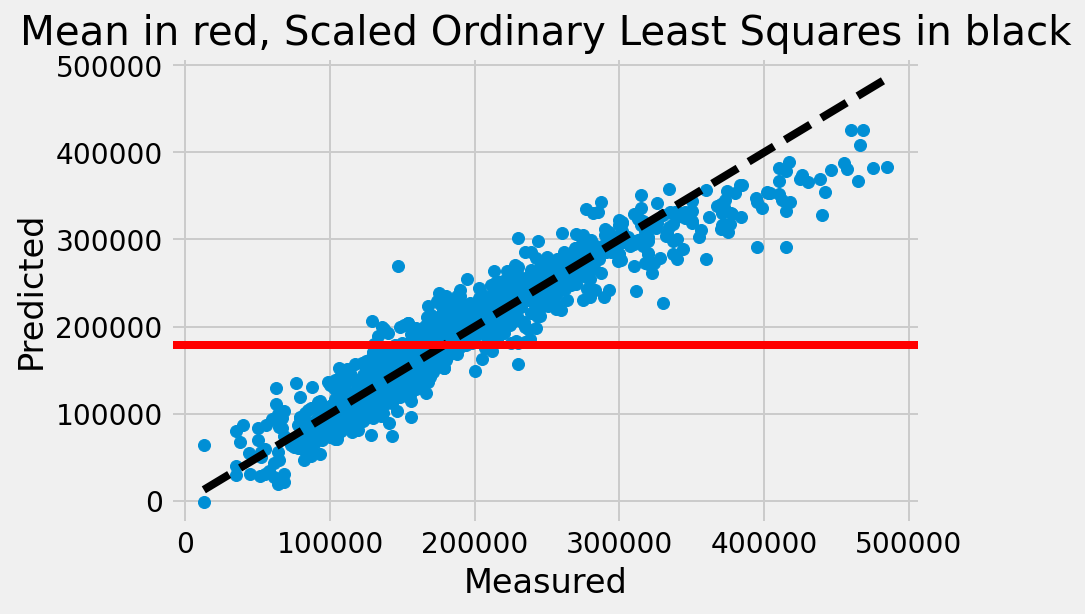

In [15]:
fig, ax = plt.subplots()

ax.scatter(y_train, y_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Scaled Ordinary Least Squares in black")
plt.show()

In [16]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 22774.76.


### RidgeCV Regression

In [17]:
# Set up a list of ridge alphas to check.
# np.logspace generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.

r_alphas = np.logspace(0, 5, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(alphas=r_alphas, scoring='r2', cv=5)

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train);

In [18]:
# Here is the optimal value of alpha

ridge_cv.alpha_

7.220809018385464

In [19]:
print(f' RidgeCV Regression training R^2 score: {round(ridge_cv.score(Z_train, y_train),4)}')
print(f' RidgeCV Regression test R^2 score: {round(ridge_cv.score(Z_test, y_test),4)}')

 RidgeCV Regression training R^2 score: 0.9022
 RidgeCV Regression test R^2 score: 0.8837


In [20]:
ridge_preds = ridge_cv.predict(Z_train)

In [21]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=ridge_preds )**.5

print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 22776.82.


### LassoCV Regression

In [22]:
# Set up a list of Lasso alphas to check.
l_alphas = np.logspace(-3, 3, 500)

# Cross-validate over our list of Lasso alphas.
lasso_cv = LassoCV(alphas=l_alphas, cv=5, max_iter=10000)

# Fit model using best ridge alpha!
lasso_cv.fit(Z_train, y_train);

#best found alpha
lasso_cv.alpha_

118.61737164524791

In [23]:
print(f' LassoCV Regression training R^2 score: {round(lasso_cv.score(Z_train, y_train),4)}')
print(f' LassoCV Regression test R^2 score: {round(lasso_cv.score(Z_test, y_test),4)}')

 LassoCV Regression training R^2 score: 0.9022
 LassoCV Regression test R^2 score: 0.8837


In [24]:
y_preds = lasso_cv.predict(Z_train)

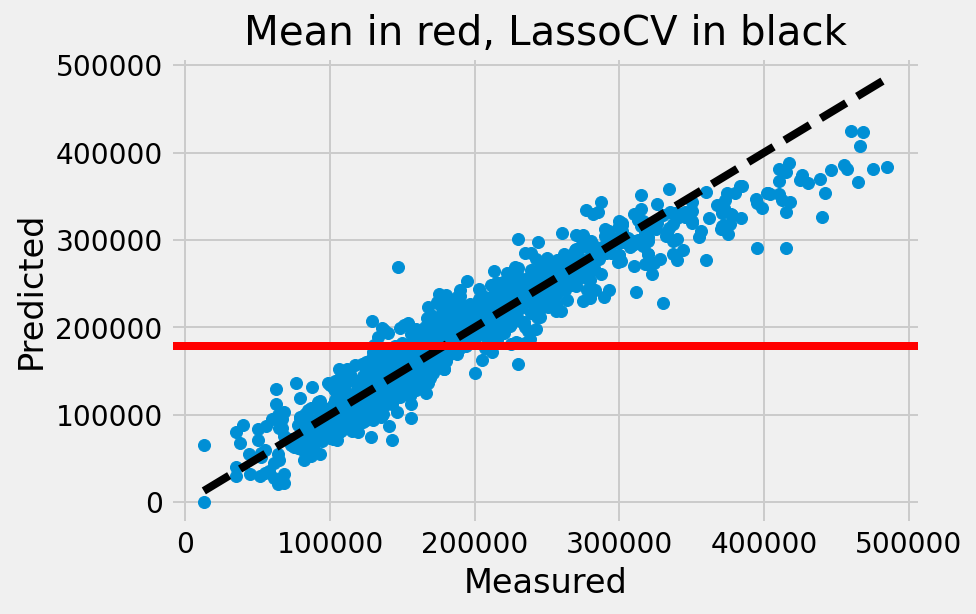

In [25]:
fig, ax = plt.subplots()

ax.scatter(y_train, y_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, LassoCV in black")
plt.show()

In [26]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 22780.88.


### What does this tell us about the model dataset?
I infer that the model is potentially underfitting and does not suffer from high variance. In the bias/variance tradeoff this model trends towards higher bias. I should be able to expect model scoring metrics to generalize to unseen data in a fairly good way. So far, this has been what we have observed. In the attempt to reduce dimensionality perhaps too many features were taken away. We will experiment with introducing polynomial features through a transformer, later on, to test if introducing additional features can increase the model score and confirm our suspicion.

Now to explore the benefits of using a pipeline and grid-search to optimize the model hyperparameters. This is best practice and if you have time should always be done. Hyperparameters are algorithm configuration that is external to the model but greatly affects the model score.

### Models utilizing Pipeline and Gridsearch. A glance at Lasso, Ridge and Elastic net.
#### Pipeline saves time by executing scaling, model initiation and polynomial feature creation.
#### Gridsearch searches for the best values in a given list of parameters

In [27]:
#create pipeline for ridge model

pipe_ridge = Pipeline([
    ('sc', StandardScaler()),
    ('ridge', Ridge())
])

In [28]:
#create parameters for gridsearch

ridge_params1 = {'ridge__alpha':np.logspace(-1, 3, 500),
                 'ridge__max_iter':[10000]}

In [29]:
# apply pipeline and gridsearch to GridSearchCV
pipe_ridge_gridsearch = GridSearchCV(pipe_ridge,
                                     param_grid=ridge_params1
                                    )

In [30]:
#fit best result from grid search

pipe_ridge_gridsearch.fit(X_train, y_train)
pipe_ridge_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('ridge', Ridge(alpha=5.695226779712822, max_iter=10000))])

In [31]:
pipe_ridge_gridsearch.best_score_

0.8940905753825783

In [32]:
y_preds = pipe_ridge_gridsearch.predict(X_train)

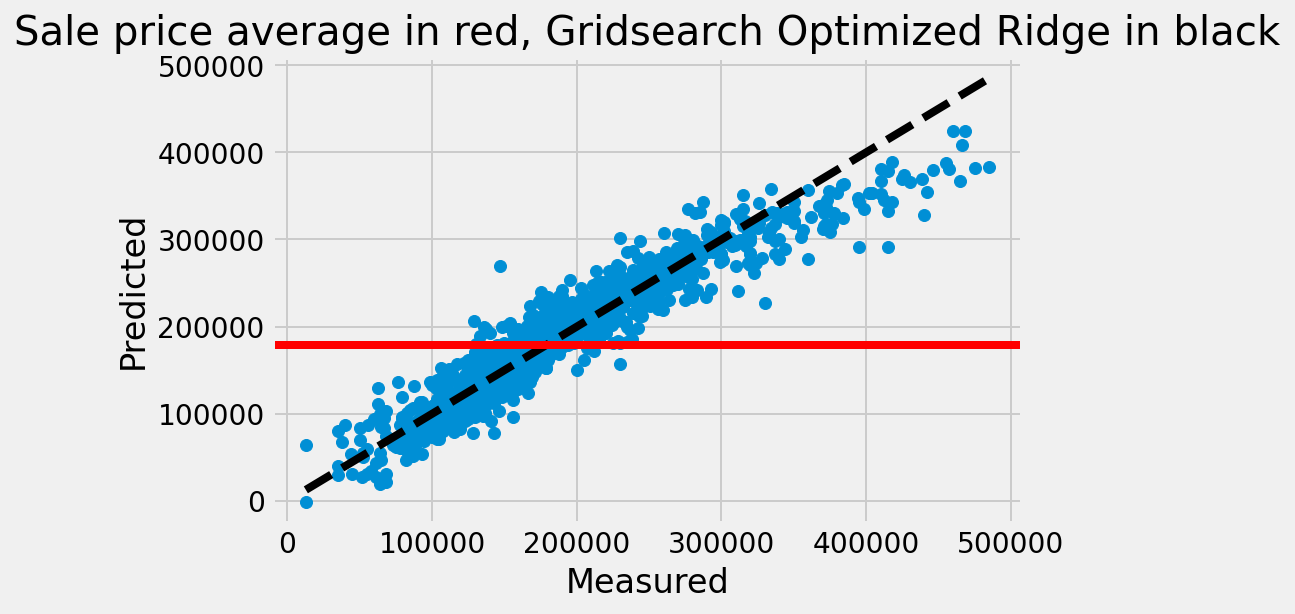

In [33]:
fig, ax = plt.subplots()

ax.scatter(y_train, y_preds)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized Ridge in black")
plt.show()

In [34]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 22776.1.


### Lasso Model

In [35]:
lasso_pipe = Pipeline([
    ('sc', StandardScaler()),
    ('lassocv', Lasso())
])

In [36]:
lasso_params = {'lassocv__alpha':np.logspace(-1, 3, 1000),
                'lassocv__max_iter':[5000],
                'lassocv__warm_start':[True]
               }

In [37]:
lasso_pipe_gridsearch = GridSearchCV(lasso_pipe,
                                     param_grid=lasso_params
                                    )

In [38]:
lasso_pipe_gridsearch.fit(X_train, y_train)
lasso_pipe_gridsearch.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('lassocv',
                 Lasso(alpha=145.60059950206485, max_iter=5000,
                       warm_start=True))])

In [39]:
print(f'LassoCV R^2 Score: {round(lasso_pipe_gridsearch.best_score_,4)}')

LassoCV R^2 Score: 0.8941


In [40]:
X_test.isnull().sum()

Building Age                         0
Neighboorhood Quality Index          0
Local Positive Features              0
Remodeled Building                   0
Overall Building Quality             0
Single Story Building                0
Multiple Story Building              0
External Quality                     0
Type of External Building Feature    0
Middle-unit Townhouse                0
End-unit Townhouse                   0
Family House                         0
High Roof Quality                    0
Masonry Vaneer Sqft                  0
Building Functionality               0
Lot Frontage                         0
Lot Size                             0
Outside Grill Space                  0
Shop Space                           0
Additional Car Garage                0
Paved Driveway                       0
Basement Quality                     0
Finished Basement Sqft               0
Basement Ceiling Height              0
Heater Quality                       0
Kitchen Quality          

In [41]:
y_preds_lassocv = lasso_pipe_gridsearch.predict(X_train)

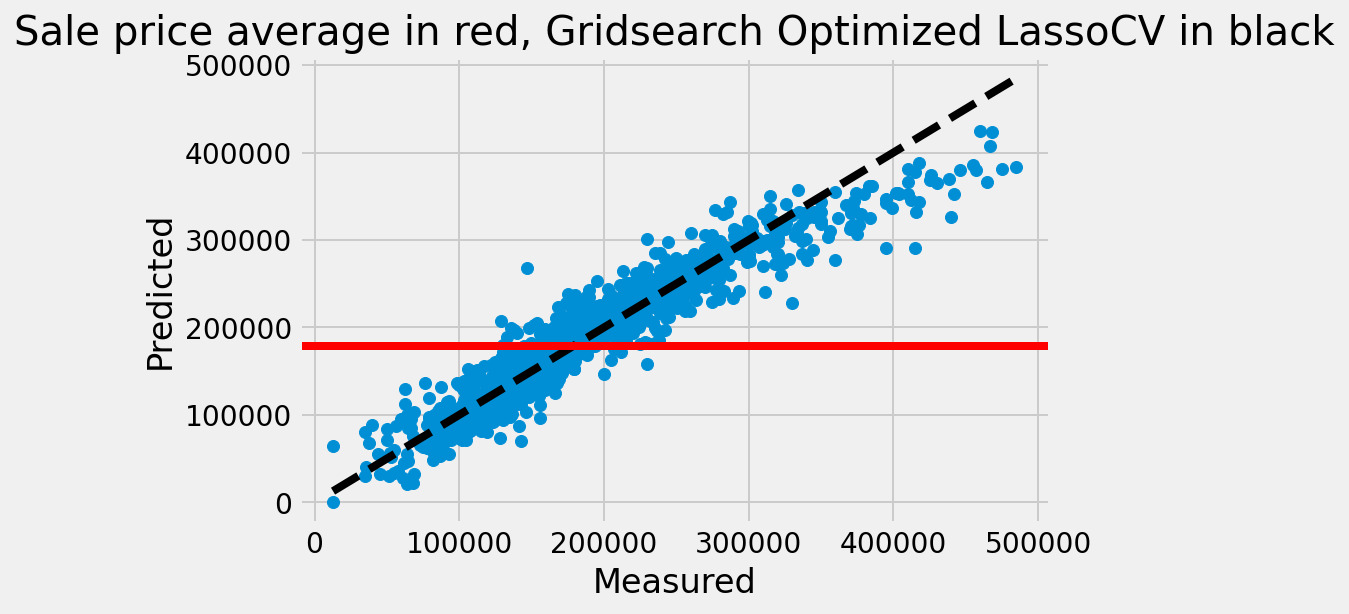

In [42]:
fig, ax = plt.subplots()

ax.scatter(y_train, y_preds_lassocv)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Sale price average in red, Gridsearch Optimized LassoCV in black")
plt.show()

In [43]:
y_train.mean()

178505.12730627306

In [44]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds_lassocv )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 22783.6.


### Lasso Coef_ Evaluation
#### Fit lassocv model with gridsearch parameters in order to look at coeficients

In [45]:
lasso_sc = StandardScaler()

lasso_Z_train = lasso_sc.fit_transform(X_train)
lasso_Z_test = lasso_sc.fit_transform(X_test)

In [46]:
lasso_coef_eval = Lasso(alpha = 145.60059950206485, max_iter=5000)

In [47]:
print(lasso_Z_train.shape)
print(y_train.shape)

(1626, 30)
(1626,)


In [48]:
lasso_coef_eval.fit(lasso_Z_train, y_train)
print(f'Lasso R^2 Cross Validated Score: {round(cross_val_score(lasso_coef_eval, lasso_Z_train, y_train).mean(),4)}') 

Lasso R^2 Cross Validated Score: 0.8942


In [49]:
lasso_coef_eval.intercept_

178505.12730627306

In [50]:
project_model = pd.DataFrame(list(zip(X_train.columns, lasso_coef_eval.coef_)))
project_model

,0,1
0,Building Age,-1676.233488
1,Neighboorhood Quality Index,7861.281669
2,Local Positive Features,3208.578935
3,Remodeled Building,2963.023820
4,Overall Building Quality,13421.415456
5,Single Story Building,-0.000000
6,Multiple Story Building,-4696.334782
7,External Quality,6593.979064
8,Type of External Building Feature,1707.624889
9,Middle-unit Townhouse,-3004.225740


In [66]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds_lassocv )**.5
MRSE

22783.6009521632

In [51]:
# put the two functions above together, using 'write binary' permissions
pickle.dump(lasso_coef_eval, open('model_ames.p', 'wb'))

### Lasso Model with polynomial features

In [52]:
lasso_poly_pipe = Pipeline([
    ('poly', PolynomialFeatures(degree = 2)), 
    ('sc', StandardScaler()),
    ('lassocv', Lasso())
])

lasso_poly_params = {'lassocv__alpha':np.logspace(1, 2.5, 100),
                     'lassocv__max_iter':[10000],
                     'lassocv__tol':[.005]
                    }

pipe_gridsearch = GridSearchCV(lasso_poly_pipe, 
                                param_grid=lasso_poly_params
                              )

In [53]:
pipe_gridsearch.fit(X_train, y_train)
pipe_gridsearch.best_estimator_

Pipeline(steps=[('poly', PolynomialFeatures()), ('sc', StandardScaler()),
                ('lassocv',
                 Lasso(alpha=123.28467394420659, max_iter=10000, tol=0.005))])

In [54]:
print(f'LassoCV With Polynomial Features R^2 Score: {round(pipe_gridsearch.best_score_,4)}')

LassoCV With Polynomial Features R^2 Score: 0.9216


In [55]:
y_preds_lassopoly = pipe_gridsearch.predict(X_train)

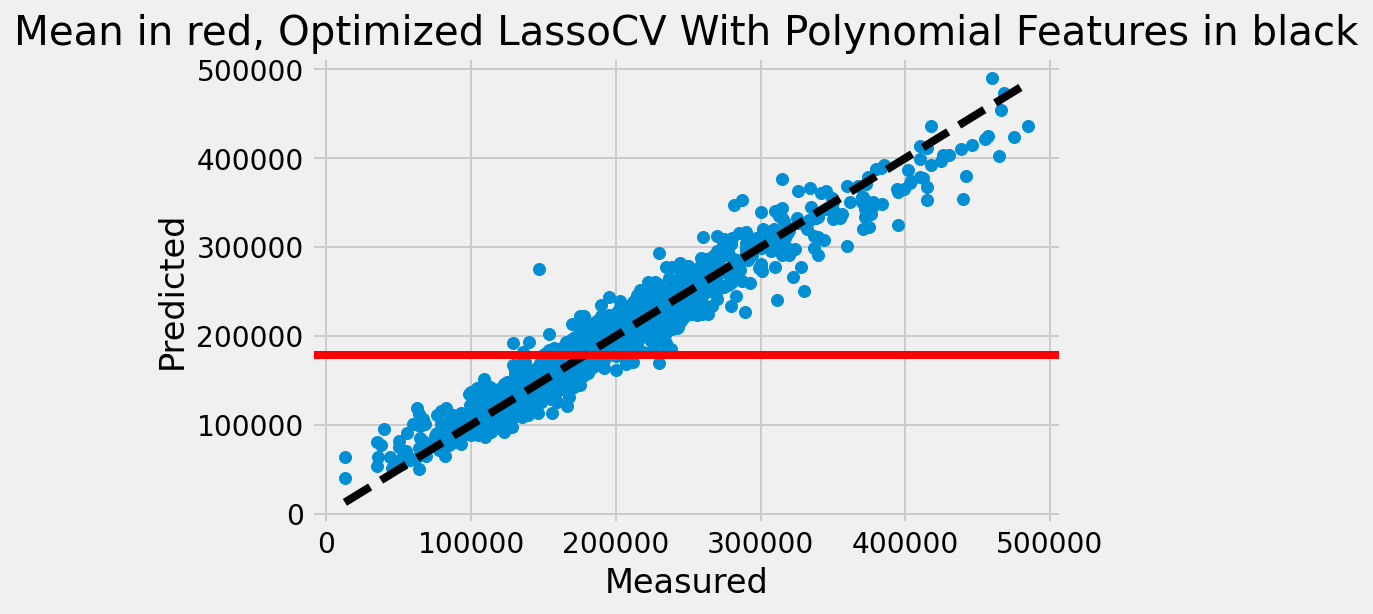

In [56]:
fig, ax = plt.subplots()

ax.scatter(y_train, y_preds_lassopoly)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, Optimized LassoCV With Polynomial Features in black")
plt.show()

In [57]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds_lassopoly )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 17351.63.


### Elastic Net Model

In [58]:
pipe_mario = Pipeline([
            #('poly', PolynomialFeatures(degree=2)),
            ('sc', StandardScaler()),
            ('elasticnet', ElasticNet())
                        ])

In [59]:
parameters_mario = {'elasticnet__alpha': np.logspace(-1, 4, 500),
                    #'elasticnet__normalize': [True, False],
                    'elasticnet__selection': ['cyclic', 'random'],
                    'elasticnet__max_iter': [10000],
                    'elasticnet__warm_start': [True]
                    #'elasticnet__tol': [.1]
                    }

In [60]:
elastic_net_model = GridSearchCV(pipe_mario,
                                 param_grid = parameters_mario
                                )

elastic_net_model.fit(X_train, y_train)
elastic_net_model.best_estimator_

Pipeline(steps=[('sc', StandardScaler()),
                ('elasticnet',
                 ElasticNet(alpha=0.1, max_iter=10000, warm_start=True))])

In [61]:
print(f'ElasticNet Model R^2 Score: {round(elastic_net_model.best_score_,4)}')

ElasticNet Model R^2 Score: 0.8938


In [62]:
y_preds_en = elastic_net_model.predict(X_train)

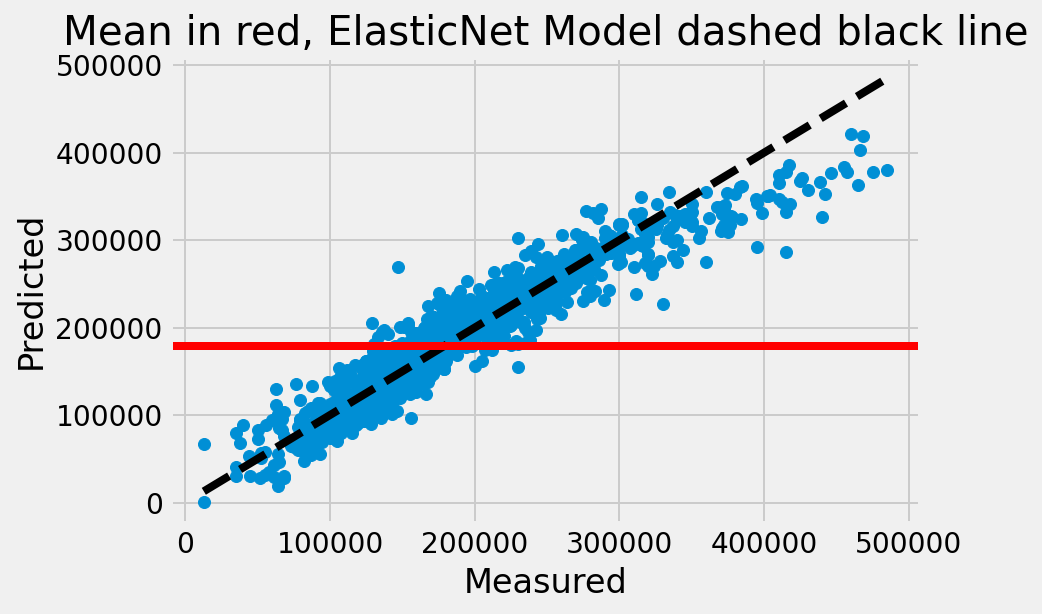

In [63]:
fig, ax = plt.subplots()

ax.scatter(y_train, y_preds_en)
ax.plot([y.min(), y.max()],[y.min(),y.max()],'k--')
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.axhline(y_train.mean(),c='red')
plt.title("Mean in red, ElasticNet Model dashed black line")
plt.show()

In [64]:
MRSE = metrics.mean_squared_error(y_true=y_train, y_pred=y_preds_en )**.5
print(f'Mean Root Square Error in dollars: {round(MRSE,2)}.')

Mean Root Square Error in dollars: 22852.39.
